In [1]:
!pip install requests
!pip install bs4
!pip install html5lib
!pip install nltk
!pip install spacy
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.7 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Webscraping

In [6]:
import requests
from bs4 import BeautifulSoup

def data_collect(url):
    res = requests.get(url)
    htmlcontent = res.content
    
    soup = BeautifulSoup(htmlcontent, 'html.parser')
    text = ''
    for para in soup.find_all('p'):
        text += para.get_text() + "\n"
    return text

url = "https://thehimalayantimes.com/sports/harry-kane-close-to-sealing-transfer-to-bayern-munich-from-tottenham"
text = data_collect(url)

## Lowering the text and processing text to sentences

In [7]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import string

nltk.download('wordnet')
nltk.download('punkt')

exclude = string.punctuation + "©"

text = text.lower()
sentences = sent_tokenize(text)
print(len(sentences))

32


[nltk_data] Downloading package wordnet to /Users/luni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/luni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Removing Punctuation from sentences

In [8]:
processed_sentences =[]
for s in sentences:
    for ele in s:
        if ele in exclude:
            s = s.replace(ele,"")
    processed_sentences.append(s)
    
print(processed_sentences[0])

more
munich august 11
england captain harry kanes transfer from tottenham to bayern munich is imminent spurs manager ange postecoglou said friday in a deal that will reportedly be worth more than 100 million pounds 110 million


## Further NLP Processing

In [9]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

processed_filtered_sentences = []

for ps in processed_sentences:
    words = word_tokenize(ps)
    stem_text = [stemmer.stem(word) for word in words]
    for word in words:
        if word not in stop_words:
            processed_filtered_sentences.append(word)
    print(words)

['more', 'munich', 'august', '11', 'england', 'captain', 'harry', 'kanes', 'transfer', 'from', 'tottenham', 'to', 'bayern', 'munich', 'is', 'imminent', 'spurs', 'manager', 'ange', 'postecoglou', 'said', 'friday', 'in', 'a', 'deal', 'that', 'will', 'reportedly', 'be', 'worth', 'more', 'than', '100', 'million', 'pounds', '110', 'million']
['after', 'spending', '19', 'years', 'at', 'tottenham', 'without', 'winning', 'a', 'trophy', 'a', 'move', 'to', 'bayern', 'would', 'allow', 'kane', 'to', 'fight', 'for', 'titles', 'in', 'the', 'german', 'league', 'and', 'in', 'europe']
['my', 'understanding', 'is', 'it', 'has', 'progressed', 'to', 'the', 'point', 'where', 'it', 'looks', 'like', 'its', 'going', 'to', 'happen', 'postecoglou', 'said', 'of', 'what', 'would', 'be', 'a', 'record', 'transfer', 'for', 'the', 'bundesliga', 'and', 'one', 'of', 'the', 'biggest', 'deals', 'of', 'the', 'summer', 'transfer', 'window']
['the', '30yearold', 'kane', 'is', 'expected', 'to', 'undergo', 'medical', 'tests',

[nltk_data] Downloading package stopwords to /Users/luni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Extracting subject, object and relationships


In [10]:
import spacy

nlp = spacy.load("en_core_web_sm")

SUBJECTS = ["nsubj", "nsubjpass", "csubj", "csubjpass", "agent", "expl"]
VERBS = ['VERB']
OBJECTS = ["dobj", "dative", "attr", "oprd", 'pobj']
relations = []

for pro in processed_sentences:
    doc = nlp(pro)
    subject = None
    obj = None
    verb = None
    
    for token in doc:
        if token.dep_ in SUBJECTS and subject is None:
            subject = token.text
        elif token.dep_ in OBJECTS and obj is None:
            obj = token.text
        if token.pos_ in VERBS and verb is None:
            verb = token.lemma_
        
    relations.append({
        "Subject": subject,
        "Object": obj, 
        "Verb": verb,
    })
    print("Sentence:", pro)
    print("Subject:", subject)
    print("Object:", obj)
    print("Verb:", verb)
    print("=" * 30)

        

Sentence: more
munich august 11
england captain harry kanes transfer from tottenham to bayern munich is imminent spurs manager ange postecoglou said friday in a deal that will reportedly be worth more than 100 million pounds 110 million
Subject: munich
Object: tottenham
Verb: transfer
Sentence: after spending 19 years at tottenham without winning a trophy a move to bayern would allow kane to fight for titles in the german league and in europe
Subject: kane
Object: years
Verb: spend
Sentence: my understanding is it has progressed to the point where it looks like its going to happen postecoglou said of what would be a record transfer for the bundesliga and one of the biggest deals of the summer transfer window
Subject: understanding
Object: point
Verb: progress
Sentence: the 30yearold kane is expected to undergo medical tests in germany on friday and could potentially make his debut saturday when bayern hosts leipzig in the german super cup
Subject: kane
Object: tests
Verb: expect
Senten

## Building a graph

In [11]:
!pip install networkx
!pip install matplotlib

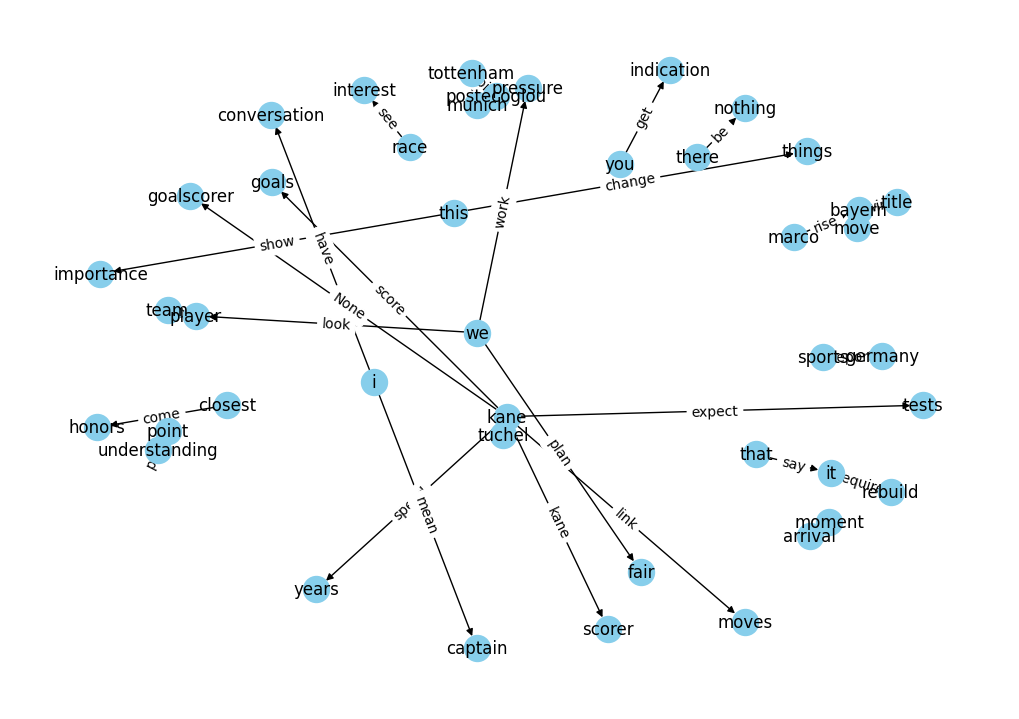

In [12]:
import networkx as nx
import matplotlib.pyplot as plt


def construct_graph(relations):
    G = nx.DiGraph()

    for relation in relations:
        subject = relation['Subject']
        verb = relation['Verb']
        obj = relation['Object']
        
        # Add nodes for subject and object
        if subject and obj:
            G.add_node(subject)
            G.add_node(obj)
            G.add_edge(subject, obj, label=verb)
    
    
    return G

graph = construct_graph(relations)

# Draw the graph
pos = nx.spring_layout(graph)
edge_labels = {(u, v): d['label'] for u, v, d in graph.edges(data=True)}

plt.figure(figsize=(10, 7))
nx.draw(graph, pos, with_labels=True, node_size=350, node_color='skyblue')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
plt.show()


## Saving the graph

In [13]:
import pickle

def save_graph(graph, filename):
    with open(filename, 'wb') as f:
        pickle.dump(graph, f)
        
filename = 'graph.pkl'
save_graph(graph, filename)

## Loading graph

In [14]:
def load_graph(filename):
    with open(filename, 'rb') as f:
        graph = pickle.load(f)
    return graph

loaded_graph = load_graph(filename)


## Querying Graph

In [16]:
def query_graph(graph, question):
    words = question.lower().split()

    if 'who' in words:
        entities = []
        for node in graph.nodes():
            if node.lower() in words:
                entities.append(node)
        if entities:
            return f"The entities that match the question are: {', '.join(entities)}"
        else:
            return "No entities found that match the question."
            
    elif 'what' in words:
        matching_edges = []
        for edge in graph.edges(data=True):
            source, target, data = edge
            label = data.get('label', '')
            if any(word in label for word in words):
                matching_edges.append((source, target, label))
        
        if matching_edges:
            answers = []
            for source, target, label in matching_edges:
                answers.append(f"{source} {label} {target}")
            return f"The relationships that match the question are: {', '.join(answers)}"
        else:
            return "No relationships found that match the question."

    elif 'where' in words:
        locations = []
        for node in graph.nodes():
            if 'location' in node.lower():
                locations.append(node)
        
        if locations:
            return f"The locations that match the question are: {', '.join(locations)}"
        else:
            return "No locations found that match the question."
    
    return "I'm sorry, I don't understand the question."

# Example question
question = "Who scored goals?"
answer = query_graph(loaded_graph, question)
print(answer)

No entities found that match the question.
